# Coupled Logistic map system illustration

In [121]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time
from tqdm.notebook import tqdm_notebook

from ipywidgets import FloatSlider, interact

import matplotlib.cm as cm
import matplotlib as mpl

%matplotlib notebook

In [122]:
# Funcitons

def bound(x):
    '''implements the reflective boundary conditions for the [0, 1 interval]
    '''
    z = x
    while not np.all(np.logical_and(z<=1, z>=0)):
        z = np.abs(z)
        inds  = np.where(z > 1)[0]
        for i in inds:
            z[i] = 1 - (z[i] - 1)
    return z

def f(z,  r=3.99):
    '''dynamics of the driver
    '''
    return np.abs(r * z * (1 - z))

def g(y, z, r=3.99, beta=0.2):
    '''dynamics of the forced system
    '''
    return bound(r * y *(1 - y - beta * z))

<IPython.core.display.Javascript object>


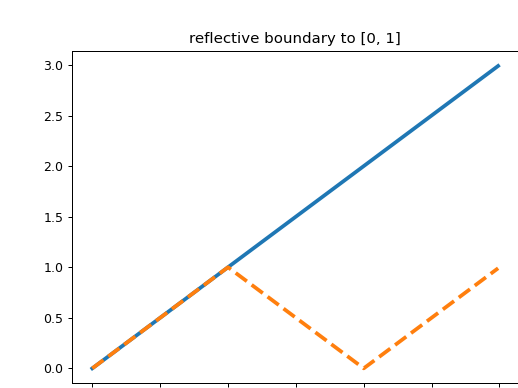

Text(0.5, 1.0, 'reflective boundary to [0, 1]')

In [123]:
# Test of the bounding function, which performs the mirroring at the boundaries of the [0, 1] interval
testline = np.arange(0, 3, 0.01)

bline = bound(testline)

plt.figure()
plt.plot(testline, lw=3)
plt.plot(bline, '--', lw=3)
plt.title('reflective boundary to [0, 1]')

(1000, 20)


<IPython.core.display.Javascript object>


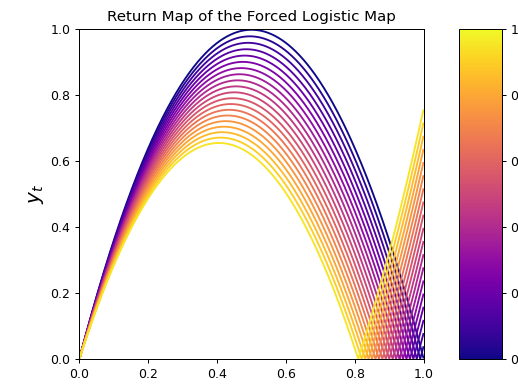

Text(0.5, 1.0, 'Return Map of the Forced Logistic Map')

In [124]:
y = np.arange(0, 1, 0.001)
zs = np.arange(0, 1, 0.05)

y_tp = np.array([g(y, z) for z in zs]).T
y_tpp = np.array([g(g(y, z), f(z)) for z in zs]).T


print(y_tpp.shape)

fig, [ax0, cb1] = plt.subplots(1, 2, gridspec_kw={'width_ratios': [8, 1]})

_ = [ax0.plot(y, y_tp[:, i], 'b', alpha=1, color=cm.plasma(zs[i])) for i in range(y_tp.shape[1])]


ax0.set_xlim(0, 1)
ax0.set_ylim(0, 1)

ax0.set_xlabel("$y_{t-1}$", fontsize=16)
ax0.set_ylabel("$y_{t}$", fontsize=16)



cmap = cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(cb1, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('value of latent driver $z_{t-1}$')


plt.tight_layout(pad=2)

plt.savefig('./resfigure/ssr2.pdf')
ax0.set_title('Return Map of the Forced Logistic Map')

<IPython.core.display.Javascript object>


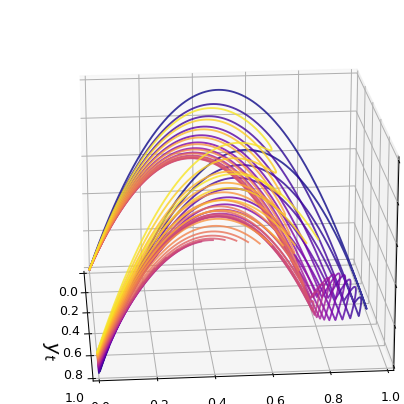

  0%|          | 0/72 [00:00<?, ?it/s]

In [125]:
color_code = []

fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111, projection='3d')
_ = [ax1.plot(y, y_tp[:, i], y_tpp[:, i], 'b', alpha=0.8, color=cm.plasma(zs[i])) for i in range(y_tp.shape[1])]

ax1.set_xlabel("$y_t$", fontsize=16)
ax1.set_ylabel("$y_{t+1}$", fontsize=16)
ax1.set_zlabel("$y_{t+2}$", fontsize=16)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_zlim([0, 1])




ax1.view_init(elev=42., azim=44)

plt.tight_layout(h_pad=0, w_pad=0, pad=0)
ax1.dist=13

plt.savefig('./resfigure/ssr.pdf')
# plt.colorbar(cax=ax1)
ax1.set_title('Forced Logistic Map Embedded into 3D')

azims = np.arange(0, 360, 5)
for azim in tqdm_notebook(azims):
    ax1.view_init(elev=20., azim=azim)
    fig.canvas.draw()
    time.sleep(0.001)

<IPython.core.display.Javascript object>


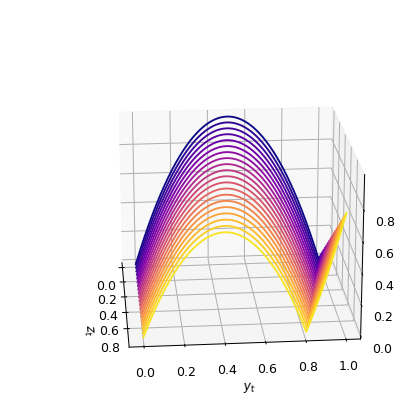

  0%|          | 0/72 [00:00<?, ?it/s]

In [126]:
fig2 = plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='3d')
_=[ax.plot(zs[i]*np.ones(len(y)), y, y_tp[:, i], 'b-', alpha=1, color=cm.plasma(zs[i])) for i in range(0, len(zs), 1)]
ax.set_xlabel("$z_t$")
ax.set_ylabel("$y_t$")
ax.set_zlabel("$y_{t+1}$")

fig2.savefig('./resfigure/join_embedding.pdf')
azims = np.arange(0, 360, 5)


for azim in tqdm_notebook(azims):
    ax.view_init(elev=20., azim=azim)
    fig2.canvas.draw()
    time.sleep(0.001)